In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
#on a 5 colonnes de type obj et 3 colonnes int64
#Il n'y a pas de données manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [ ]:
#il n'existe pas de doublons
doublons = data[data.duplicated()]
print(doublons)

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


# data analysis

In [ ]:
gender=data.value_counts('gender')
print(gender)

gender
male      508
female    492
dtype: int64


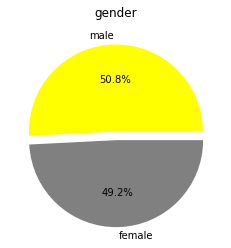

In [ ]:
#pour ce dataset on remarque que les garcons sont plus que les filles avec un percentage de 1,6%
figure, axe = plt.subplots()
axe.set_title('gender')
axe.pie(gender,labels=['male','female'],colors=['#FFFF00',"#808080"],autopct='%1.1f%%',
        explode=(0,0.1))
plt.show()

<AxesSubplot:xlabel='lunch', ylabel='count'>

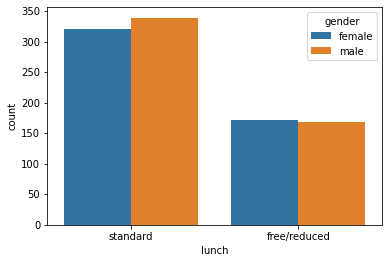

In [ ]:
#La moitié des étudiantes reçoivent un déjeuner gratuit ou à tarif réduit,
#avec une répartition équitable entre les filles et les garçons.
sns.countplot(data=data,x="lunch",hue='gender')

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

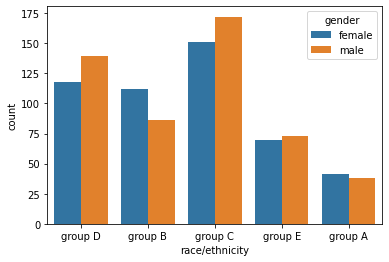

In [ ]:
#Nous observons que seuls les groupes B et A présentent une proportion plus élevée de garçons par rapport aux filles
#Le groupe C et D compte un nombre plus élevé d'étudiantes par rapport aux autres groupes.
sns.countplot(data=data,x="race/ethnicity",hue='gender')

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

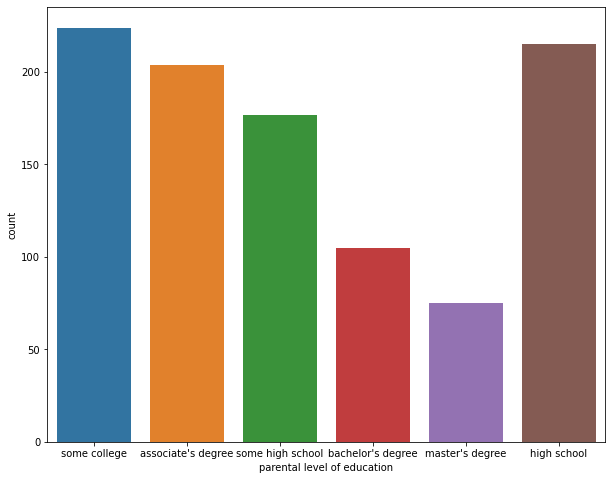

In [ ]:
#Il est notable que la plupart des parents ont atteint un niveau de scolarité allant du CEM au lycée
plt.figure(figsize=(10, 8))
sns.countplot(data=data,x='parental level of education')

In [ ]:
test_pre=data.value_counts('test preparation course')
print(test_pre)

test preparation course
none         656
completed    344
dtype: int64


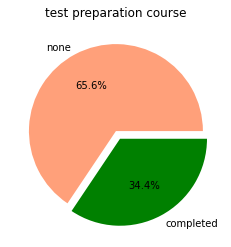

In [ ]:
#65,6 % des étudiants n'ont pas terminer le test de préparation.
#Cela peut véritablement avoir un impact sur les performances des étudiantes.
figure, axe = plt.subplots()
axe.set_title('test preparation course')
axe.pie(test_pre,labels=['none','completed'],colors=['#FFA07A','#008000'],autopct='%1.1f%%',
        explode=(0,0.1))
plt.show()

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

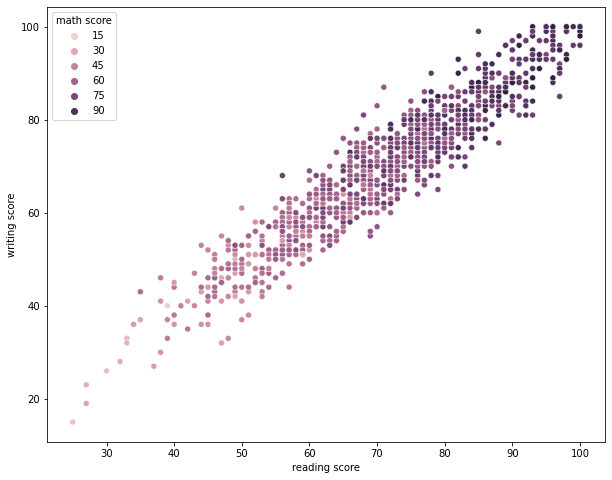

In [ ]:
#On observe une relation linéaire positive entre le score en mathématiques,
#le score en lecture (reading), et le score en écriture (writing).
plt.figure(figsize=(10, 8))
sns.scatterplot(x="reading score",
                    y="writing score",
                    hue="math score",
                    data=data)

<AxesSubplot:xlabel='lunch', ylabel='count'>

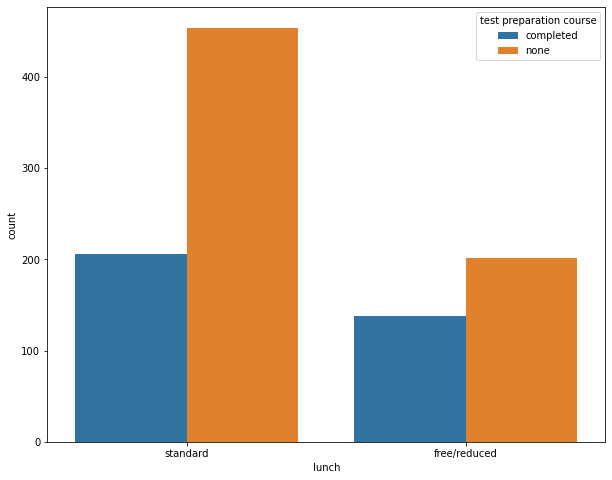

In [ ]:
#Il est observé que les étudiants bénéficiant d'une réduction
#ou d'un déjeuner gratuit ont une probabilité plus élevée
#de terminer leur test de préparation
plt.figure(figsize=(10, 8))
sns.countplot(data=data,x="lunch",hue='test preparation course')

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

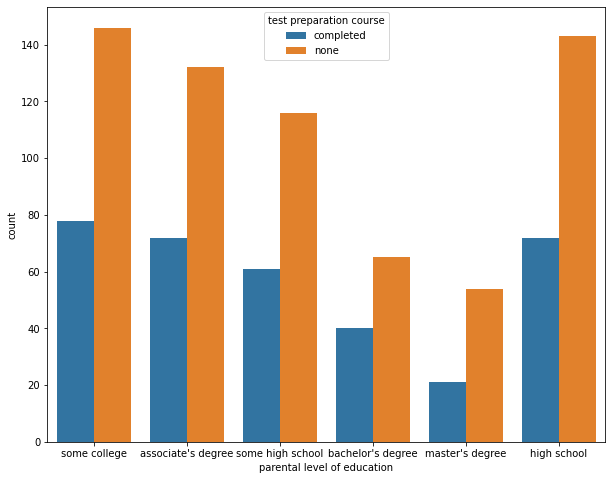

In [ ]:
#On peut observer ici que la plupart des parents ne poussent pas leurs enfants à se préparer pour leurs cours,
#indépendamment du niveau d'éducation des parents.
plt.figure(figsize=(10, 8))
sns.countplot(data=data,x="parental level of education",hue='test preparation course')

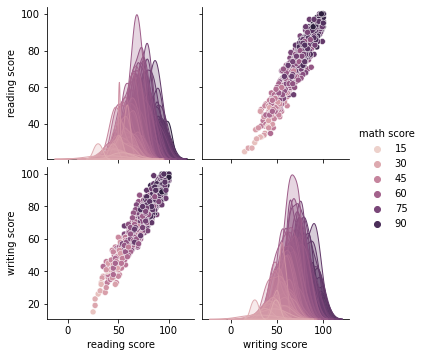

In [ ]:
import seaborn as sns
sns.pairplot(data[['reading score','writing score','math score']],hue='math score')

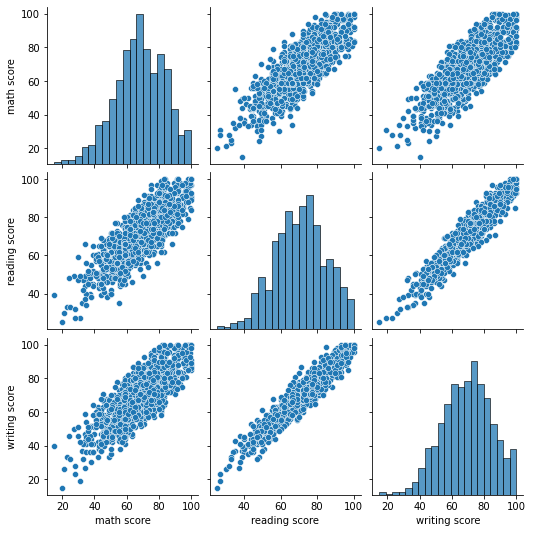

In [ ]:
sns.pairplot(data)

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

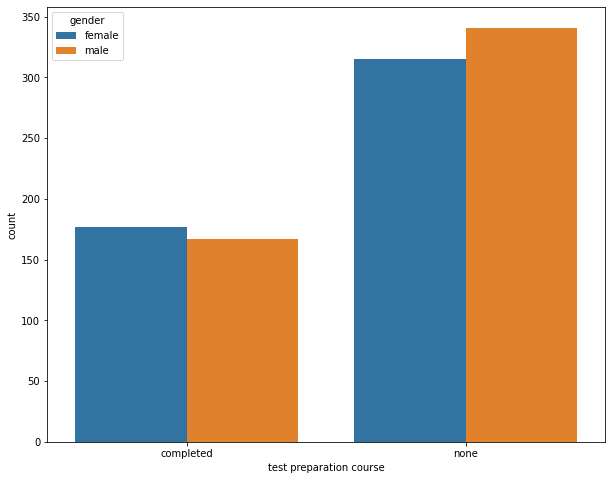

In [ ]:
#On remarque qu'il n'y a pas de grande différence entre les filles et les garçons en ce qui concerne la préparation des cours.
plt.figure(figsize=(10, 8))
sns.countplot(data=data,x="test preparation course",hue="gender")

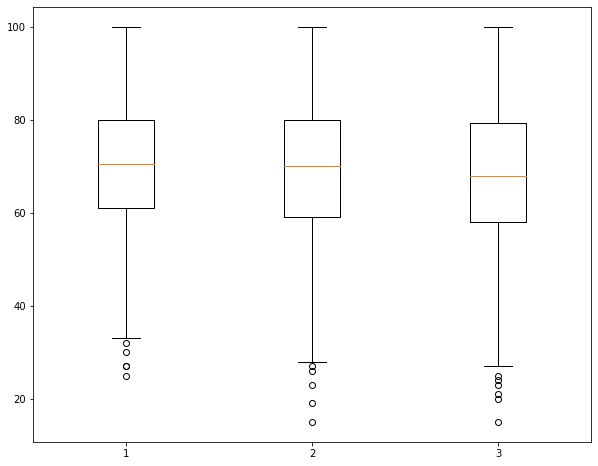

In [ ]:
#on examine pour eleminer les outliers
#Il n'est pas possible d'éliminer les scores faibles, car ces scores ont effectivement leur place et leur signification.
plt.figure(figsize=(10, 8))
plt.boxplot(data[['reading score','writing score','math score']])
plt.show()

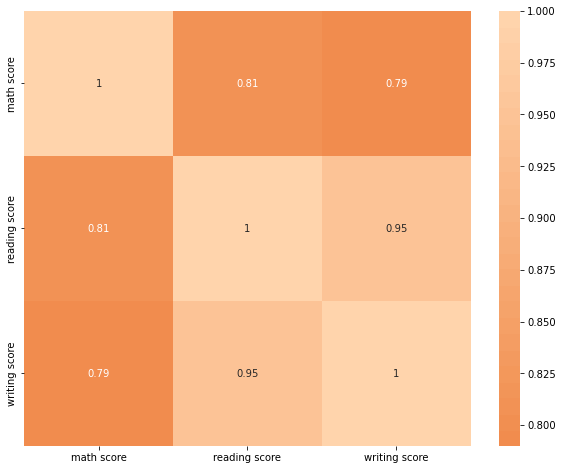

In [ ]:
##Matrice de corrélation
#La corrélation ici est très forte, ce qui signifie qu'aucune colonne ne peut être supprimée
matrice_corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrice_corr,annot=True,center=0)
plt.show()

# Rapport Final d'Analyse sur la Performance des Étudiantes:
**en examinant plusieurs aspects importants. Voici un résumé des résultats clés :**

Soutien Alimentaire : Environ la moitié des étudiantes reçoivent un déjeuner gratuit ou à tarif réduit, avec une répartition équitable entre les filles et les garçons. Ce soutien alimentaire peut avoir un impact sur le bien-être des étudiantes et, par conséquent, sur leurs performances académiques.

Différences par Groupes :Il est nécessaire de répartir équitablement les étudiantes dans les quatre groupes afin d'éviter une surcharge qui pourrait entraîner des perturbations au niveau de leurs performances.

Niveau d'Éducation des Parents : Il est remarquable que la plupart des parents aient atteint un niveau de scolarité allant du CEM au lycée. Cette réalité peut influencer la capacité des parents à soutenir l'éducation de leurs enfants. Cela souligne la nécessité potentielle d'une sensibilisation et de programmes d'éducation parentale.

Taux d'Inachèvement du Test : Un pourcentage substantiel de 65,6 % des étudiants n'ont pas réussi à achever le test de préparation. Ceci indique clairement que la préparation au test a un impact significatif sur la performance des étudiantes

Corrélation des Variables : La corrélation observée entre les variables 'score math','reading score','writing score' est très forte, ce qui suggère que chaque variable joue un rôle dans la performance des étudiantes, soulignant l'importance de les considérer toutes dans les futures analyses.
